# Exploring weather trends
In this project, I analyzed local and global temperature data and compared the temperature trends where I live to overall global temperature trends.
## Table of Contents
<ul>
<li><a href="#extract">Extract the data from the database</a></li>
<li><a href="#open">Open up the CSV</a></li>
<li><a href="#linechart">Create a line chart</a></li>
<li><a href="#analysis">Analysis of data</a></li>
</ul>

<a id='extract'></a>
## Extract the data from the database
Udacity provided a workspace with a database of average annual temperature data for the world as well as for different cities all over the planet. I got a list of Uzbekistan cities with the following SQL command.
```sql
SELECT * FROM city_list WHERE country = 'Uzbekistan'
```
I live in Tashkent. Fortunately, the city was on the list. So, I chose it for the analysis.

I obtained Tashkent and global temperatures using
```sql
SELECT
  c.year "Year",
  c.avg_temp "Tashkent",
  g.avg_temp "Global"
FROM global_data g
JOIN city_data c ON c.year = g.year
WHERE
  c.city = 'Tashkent'
```
As the goal of the project was comparison, I obtained data only for years when both temperatures were available by using ***INNER JOIN*** with two tables ***ON*** year.
I downloaded data in CSV format to the file ***Temperature.csv***.

<a id='open'></a>
## Open up the CSV
Udacity suggested using Excel or Google sheets. But I decided to make this project more challenging and selected Python for data processing and visualisation. Python has a lot of great libraries for such tasks. I chose ***pandas*** for data processing and ***matplotlib*** for visualisation. Also I decided to use ***Jupyter Notebooks*** to create this document.

First of all, I had to import libraries to the Python script.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import pandas as pd

Then I used pandas to import data from the CSV file and got the pandas dataframe. `index_col=0` parameter points pandas to use the year column for index.

In [2]:
df = pd.read_csv("Temperature.csv", index_col=0)

#### First 5 rows of DataFrame

In [3]:
df.head()

,Tashkent,Global
Year,,
1832,9.48,7.45
1833,9.93,8.01
1834,9.95,8.15
1835,9.15,7.39
1836,9.65,7.70


#### DataFrame information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1832 to 2013
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tashkent  182 non-null    float64
 1   Global    182 non-null    float64
dtypes: float64(2)
memory usage: 4.3 KB


<a id='linechart'></a>
## Create a line chart
To create a line chart, I had to calculate the moving average for temperatures. Pandas has an integrated method to calculate it. So I simply replaced data in the dataframe with calculated numbers. `window=25` sets a 25-year window for the moving average. I selected this value because it smoothed the result chart optimally for further analysis.

In [5]:
df['Tashkent'] = df.rolling(window=25)['Tashkent'].mean()
df['Global'] = df.rolling(window=25)['Global'].mean()

Then I configured the size parameters for the result graph.

In [6]:
params = {
    'legend.fontsize': 24,
    'figure.figsize': (20, 10),
    'axes.labelsize': 24,
    'axes.titlesize': 28,
    'xtick.labelsize': 'xx-large',
    'ytick.labelsize': 'xx-large'
}
plt.rcParams.update(params)

Finally I could plot the dataframe and give the proper title and y-axis label to the line chart.

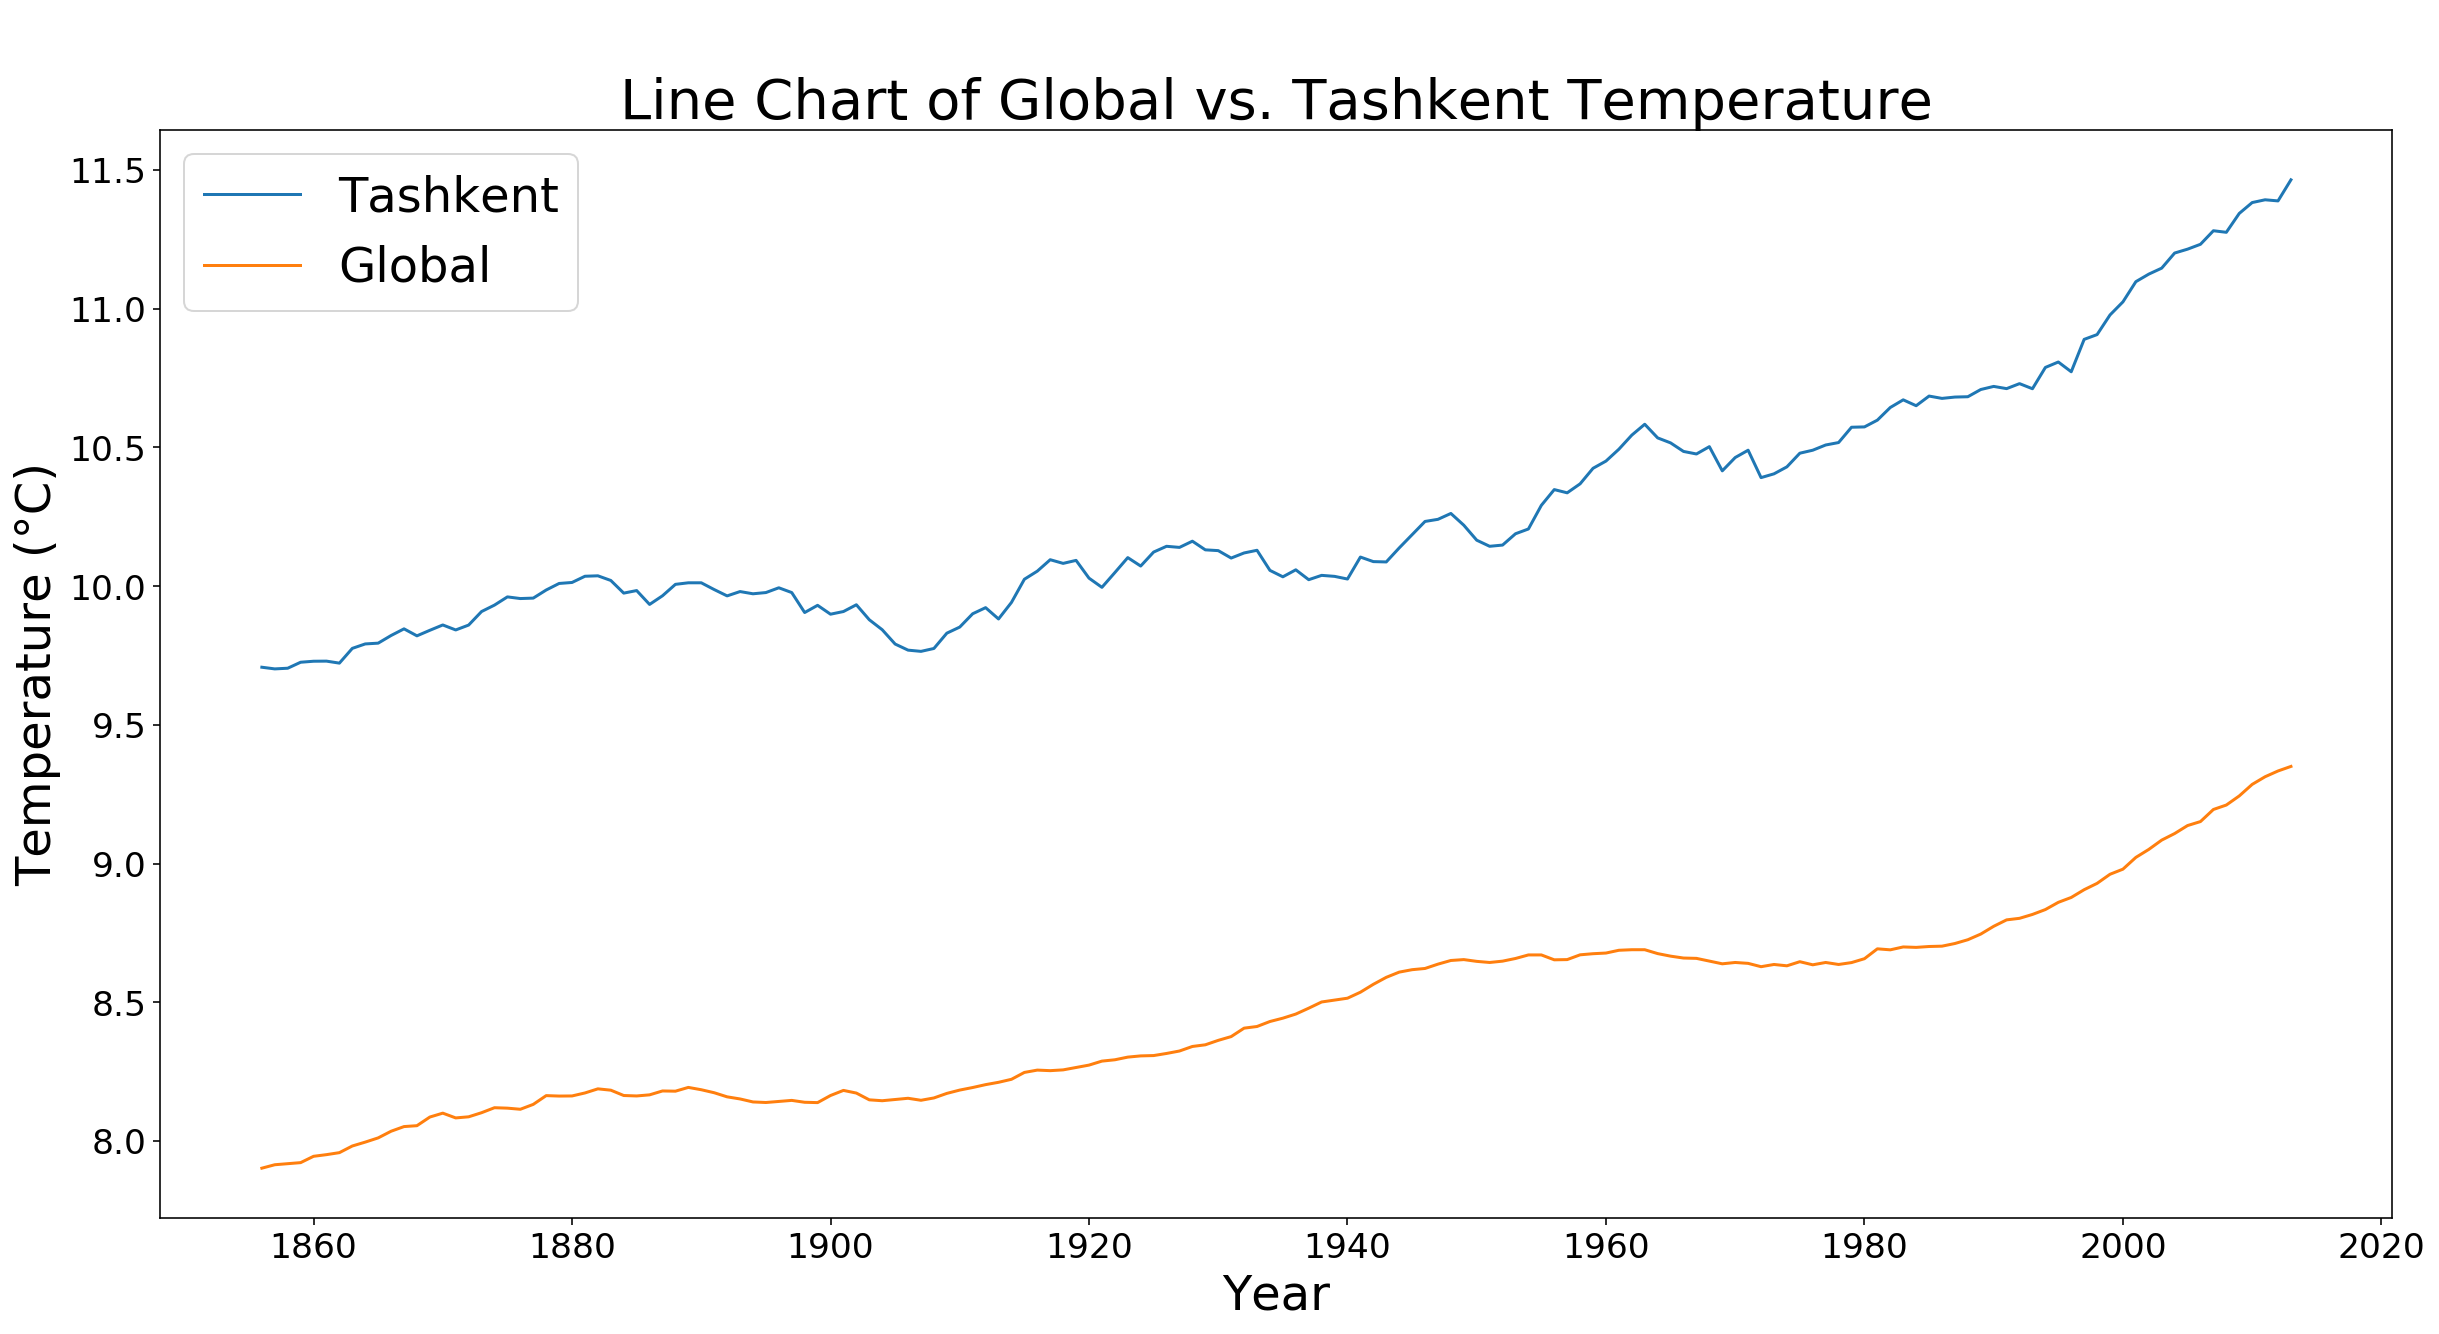

In [7]:
df.plot()
plt.title('\nLine Chart of Global vs. Tashkent Temperature')
plt.ylabel('Temperature (°C)')
plt.show()

<a id='analysis'></a>
## Analysis of data
This graph shows temperature changes both globaly and in Tashkent city, covering the period from 1840 to 2015.

We can see that generally, Tashkent and global temperatures have been increasing throughout the whole period. There was a rapid rise of temperature between 1900 and 1950. Then we can observe the temperature cooling down untill 1980. After this period, the temperature began to climb again untill 2015. This cooling was associated with high concentrations of [atmospheric aerosols](https://www.nasa.gov/centers/langley/news/factsheets/Aerosols.html), which were increased after the start of the Industrial Revolution. Also [a large volcanic eruption occured in 1963](https://en.wikipedia.org/wiki/Mount_Agung) that affected climate significantly.

The temperature in Tashkent increased by

In [8]:
print(round(df['Tashkent'].max() - df['Tashkent'].min(), 2), "°C.")

1.76 °C.


Global temperature increased by

In [9]:
print(round(df['Global'].max() - df['Global'].min(), 2), "°C.")

1.45 °C.


On average, the temperature in Tashkent is hotter than the global temperature by

In [10]:
print(round(df['Tashkent'].sub(df['Global'], axis=0).mean(), 2), "°C.")

1.8 °C.


The Tashkent / global temperature ratio is

In [11]:
print("{:.2f}.".format(df['Tashkent'].div(df['Global'], axis=0).mean()))

1.21.


The Overall changes in temperatures are similar. The correlation coefficient is

In [12]:
print("{:.2f}.".format(df['Tashkent'].corr(df['Global']), 2))

0.95.


As the correlation coefficient is pretty high, we can estimate the temperature in Tashkent based on the global temperature by multiplying it by calculated ratio coefficient.